# Intelligent Claims Processing: Exploratory Data Analysis (EDA)

## Overview

This notebook presents an in-depth Exploratory Data Analysis (EDA) of an insurance claims dataset in</br>
preparation for building an **Intelligent Claims Processing System**. The goal is to understand the structure, quality, </br>
and patterns within the data to support downstream tasks such as **claims triaging, summarization, fraud detection**,</br>
and **automation using Large Language Models (LLMs)**.

Key steps include:

- Identifying and handling missing values.
- Analyzing the distribution of claims by **age, gender, location, and injury type**.
- Exploring **temporal trends** such as accident dates and claim delays.
- Engineering new features like **age groups** and **months** to extract deeper insights.
- Highlighting key business areas like **high-volume districts**, **frequent injury types**, and **claim status outcomes**.

The EDA findings will guide the design of intelligent features, inform preprocessing </br>
decisions, and help define business rules that can be enhanced using machine learning and generative AI tools.


In [2]:
import sys
import os


sys.path.append(os.path.abspath('../data'))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from get_data import load_claim_data # type: ignore

import matplotlib.pyplot as plt # type: ignore
import seaborn as sns
import numpy as np
import pandas as pd
from pipeline.preprocessing import clean_claim_data, add_claim_features # type: ignore


import warnings
warnings.filterwarnings("ignore")

In [3]:
url = "https://data.ny.gov/resource/jshw-gkgu.json"
params = {
    "$limit": "50000"
}

claim_data = load_claim_data(url, params)
claim_data.head()

,accident_ind,accident_date,age_at_injury,alternative_dispute_resolution,ancr_date,assembly_date,atty_rep_ind,average_weekly_wage,birth_year,c2_date,...,ppd_non_scheduled_loss_date,section_32_date,wcio_cause_of_injury_code,wcio_cause_of_injury_desc,wcio_nature_of_injury_code,wcio_nature_of_injury_desc,wcio_pob_code,wcio_pob_desc,controverted_date,ptd_date
0,Y,1999-11-01T00:00:00.000,72,N,2001-12-14T00:00:00.000,2000-01-03T00:00:00.000,Y,200.00,1927,2000-01-06T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Y,1999-08-31T00:00:00.000,43,N,2001-03-30T00:00:00.000,2000-01-03T00:00:00.000,Y,296.51,1955,2000-05-05T00:00:00.000,...,2007-10-22T00:00:00.000,2015-04-14T00:00:00.000,56,LIFTING,52,STRAIN OR TEAR,42,LOWER BACK AREA,NaN,NaN
2,Y,1999-11-01T00:00:00.000,69,N,NaN,2000-01-03T00:00:00.000,Y,0.00,1930,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Y,1999-11-18T00:00:00.000,38,N,2000-08-25T00:00:00.000,2000-01-03T00:00:00.000,Y,250.00,1961,2000-01-28T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y,1999-12-14T00:00:00.000,33,N,2000-07-10T00:00:00.000,2000-01-03T00:00:00.000,N,980.55,1965,1999-12-22T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# view of all the columns through transpose method
claim_data.head().T

,0,1,2,3,4
accident_ind,Y,Y,Y,Y,Y
accident_date,1999-11-01T00:00:00.000,1999-08-31T00:00:00.000,1999-11-01T00:00:00.000,1999-11-18T00:00:00.000,1999-12-14T00:00:00.000
age_at_injury,72,43,69,38,33
alternative_dispute_resolution,N,N,N,N,N
ancr_date,2001-12-14T00:00:00.000,2001-03-30T00:00:00.000,NaN,2000-08-25T00:00:00.000,2000-07-10T00:00:00.000
assembly_date,2000-01-03T00:00:00.000,2000-01-03T00:00:00.000,2000-01-03T00:00:00.000,2000-01-03T00:00:00.000,2000-01-03T00:00:00.000
atty_rep_ind,Y,Y,Y,Y,N
average_weekly_wage,200.00,296.51,0.00,250.00,980.55
birth_year,1927,1955,1930,1961,1965
c2_date,2000-01-06T00:00:00.000,2000-05-05T00:00:00.000,NaN,2000-01-28T00:00:00.000,1999-12-22T00:00:00.000


In [5]:
# filtering and segmentation of raw data
LLM_data = claim_data[[
    'claim_identifier',          
    'claim_type',                 
    'claim_injury_type',          
    'accident_date',              
    'accident_ind',               
    'oiics_event_exposure_desc',  
    'oiics_nature_injury_desc',  
    'oiics_injury_source_desc',   
    'wcio_cause_of_injury_desc',  
    'wcio_nature_of_injury_desc', 
    'current_claim_status',       
    'gender', 
    'age_at_injury',   
    'district_name', 
    'zip_code'
]]


In [6]:
LLM_data.head()

,claim_identifier,claim_type,claim_injury_type,accident_date,accident_ind,oiics_event_exposure_desc,oiics_nature_injury_desc,oiics_injury_source_desc,wcio_cause_of_injury_desc,wcio_nature_of_injury_desc,current_claim_status,gender,age_at_injury,district_name,zip_code
0,1,WORKERS COMPENSATION CLAIM,5. PPD SCH LOSS,1999-11-01T00:00:00.000,Y,ASSAULTS AND VIOLENT ACTS BY PERSON(S),"TRAUMATIC INJURIES TO BONES, NERVES, SPINAL CORD",PERSON--OTHER THAN INJURED OR ILL WORKER,NaN,NaN,NO FURTHER ACTION,F,72,NYC,10021
1,2,WORKERS COMPENSATION CLAIM,6. PPD NSL,1999-08-31T00:00:00.000,Y,OVEREXERTION,"TRAUMATIC INJURIES TO MUSCLES, TENDONS, JOINTS...",CONTAINERS--NONPRESSURIZED,LIFTING,STRAIN OR TEAR,NO FURTHER ACTION,F,43,NYC,10029
2,3,WORKERS COMPENSATION CLAIM,2. NON-COMP,1999-11-01T00:00:00.000,Y,NaN,NaN,NaN,NaN,NaN,NO FURTHER ACTION,M,69,NYC,11220
3,4,WORKERS COMPENSATION CLAIM,5. PPD SCH LOSS,1999-11-18T00:00:00.000,Y,HIGHWAY ACCIDENT,"TRAUMATIC INJURIES TO BONES, NERVES, SPINAL CORD","HIGHWAY VEHICLE, MOTORIZED",NaN,NaN,NO FURTHER ACTION,M,38,NYC,11415
4,5,WORKERS COMPENSATION CLAIM,4. TEMPORARY,1999-12-14T00:00:00.000,Y,NaN,NaN,NaN,NaN,NaN,NO FURTHER ACTION,M,33,NYC,UNKNO


In [7]:
# checking the structure of the data
LLM_data.shape

(50000, 15)

In [8]:
# understanding data types
LLM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   claim_identifier            50000 non-null  object
 1   claim_type                  50000 non-null  object
 2   claim_injury_type           50000 non-null  object
 3   accident_date               49285 non-null  object
 4   accident_ind                50000 non-null  object
 5   oiics_event_exposure_desc   22725 non-null  object
 6   oiics_nature_injury_desc    22725 non-null  object
 7   oiics_injury_source_desc    22725 non-null  object
 8   wcio_cause_of_injury_desc   2117 non-null   object
 9   wcio_nature_of_injury_desc  2087 non-null   object
 10  current_claim_status        50000 non-null  object
 11  gender                      50000 non-null  object
 12  age_at_injury               50000 non-null  object
 13  district_name               50000 non-null  ob

In [9]:
# checking completness
LLM_data.isna().sum()

claim_identifier                  0
claim_type                        0
claim_injury_type                 0
accident_date                   715
accident_ind                      0
oiics_event_exposure_desc     27275
oiics_nature_injury_desc      27275
oiics_injury_source_desc      27275
wcio_cause_of_injury_desc     47883
wcio_nature_of_injury_desc    47913
current_claim_status              0
gender                            0
age_at_injury                     0
district_name                     0
zip_code                          0
dtype: int64

### 1. Objective: Understanding and Handling Missing Data

Before applying any modeling, summarization, or reporting logic, it's essential to assess **data completeness**. </br>
Missing values not only affect the performance of predictive models (like LLMs), </br>
but can also introduce bias or lead to misinterpretation of claims behavior.

### Why This Step Matters
- Helps determine whether certain features are usable or too incomplete </br>
- Guides cleaning strategy: whether to drop, impute, or engineer around the missingness </br>
- Reveals operational gaps (e.g., injury descriptors often missing) that may inform process improvement

### What We Aim to Achieve
- Identify which features are missing most frequently </br>
- Decide **what to drop** (irrecoverable or too sparse)
- Decide **what to impute** (fields that are important for modeling or EDA) </br>
- Build a **clean, LLM-friendly dataset** by avoiding unnecessary noise and structural gaps </br>

The visual below displays the number of missing entries per column, </br>
allowing us to make evidence-based decisions in the data cleaning phase.

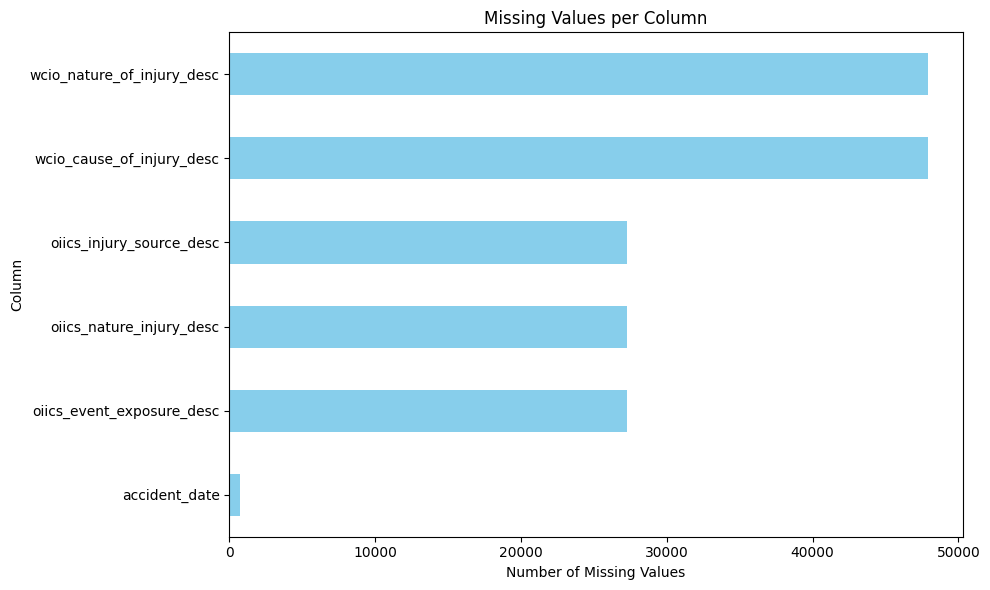

In [10]:

# visualization of fields with missing valued
missing = LLM_data.isna().sum()
missing = missing[missing > 0].sort_values(ascending=True)

plt.figure(figsize=(10, 6))
missing.plot(kind='barh', color='skyblue')
plt.title("Missing Values per Column")
plt.xlabel("Number of Missing Values")
plt.ylabel("Column")
plt.tight_layout()
plt.show()

### Handling Missing Data: Feature Elimination and Imputation

The bar chart above visualizes the number of missing values per column in the claims dataset. </br>
Several fields — particularly those related to injury classification (`wcio_` and `oiics_` descriptors) —  </br>
exhibit extremely high levels of missingness, with over 27,000 to 48,000 null entries. </br>

#### 🔴 Columns Dropped (≥ 50% missing)
The following features were dropped from the dataset due to excessive missingness, which made </br>
them unreliable and potentially harmful to downstream analysis or modeling: </br>

- `oiics_event_exposure_desc`
- `oiics_nature_injury_desc`
- `oiics_injury_source_desc`
- `wcio_cause_of_injury_desc`
- `wcio_nature_of_injury_desc`

These fields were contributing limited analytical value due to their sparsity and would increase noise in LLM summarization tasks. </br>

#### 🟡 Column Retained & Imputed: `accident_date`
Although `accident_date` had some missing values, its overall completeness was above 98%. </br>
Since it plays a critical role in temporal analysis (e.g., calculating delays, seasonality),  </br>
we **retained** the field and **imputed** missing values with a placeholder value:

### 2. Objective: Assessing Missing Data by Claim Type

This analysis aims to identify whether certain claim types (e.g., *Non-WC* vs *Workers' Compensation*) </br>
have systematic differences in missing data across key features. </br>

By examining missingness by claim category, we can: </br>
- Make **targeted data cleaning decisions** rather than applying global thresholds </br>
- Detect operational inconsistencies in data collection processes </br>
- Inform **feature selection** for downstream modeling and summarization tasks using LLMs </br>

The heatmap below shows the **percentage of missing values per feature**, grouped by `claim_type`.

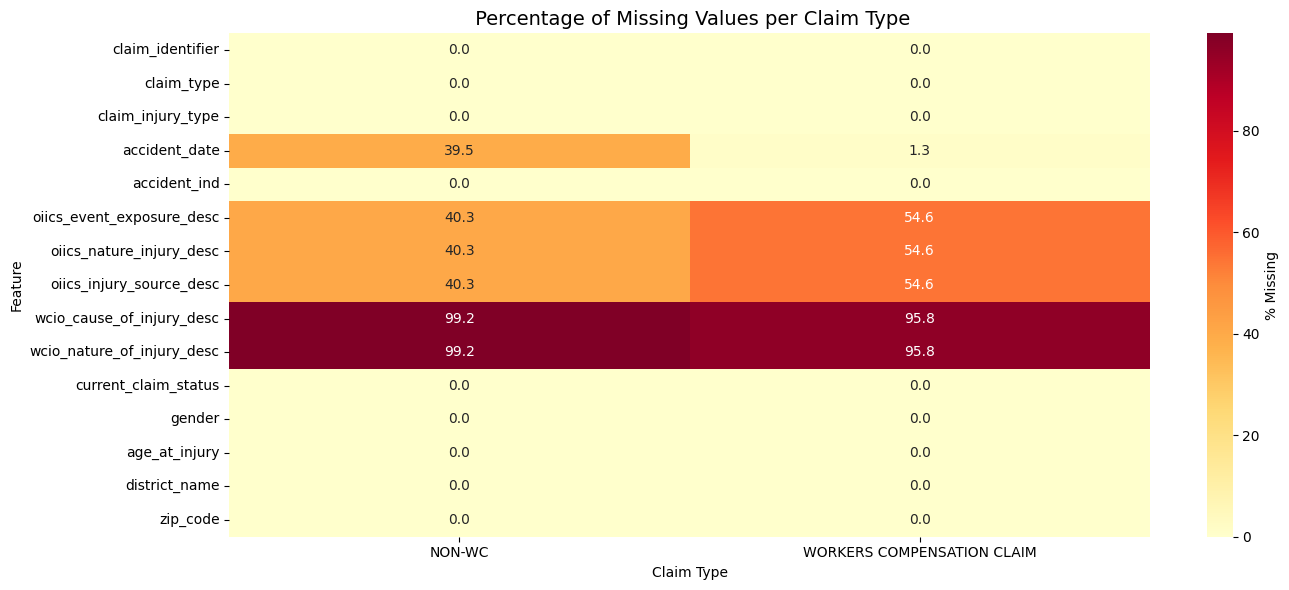

In [11]:
# Calculate missing percentage per column grouped by claim_type
missing_by_claim_type = (
    LLM_data
    .groupby('claim_type')
    .apply(lambda x: x.isna().mean() * 100)
    .transpose()
)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(missing_by_claim_type, cmap='YlOrRd', annot=True, fmt=".1f", cbar_kws={'label': '% Missing'})
plt.title(" Percentage of Missing Values per Claim Type", fontsize=14)
plt.xlabel("Claim Type")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Insights from the Visual:

- `accident_date` is missing in **~40% of Non-WC claims**, but **only ~1.3%** in Workers' Compensation claims. 
   This suggests differing reporting standards between claim types.
- Structured injury descriptors (`oiics_` and `wcio_` columns) have **very high missingness**:
  - **Over 99% missing** in Non-WC claims
  - **~95% missing** in WC claims  
  These fields are too sparse to be useful for modeling or LLM input, especially if not consistently collected.
- All other columns (`claim_type`, `district_name`, `zip_code`, `gender`, etc.) show **complete data** 
across both categories, making them reliable for modeling and reporting.

These findings informed our cleaning strategy — we **dropped high-null columns** and **retained key temporal fields** 
for further use in triaging and summarization tasks.

In [12]:
#cleaning data

Cleaned_LLM_data = clean_claim_data(LLM_data, null_threshold=0.5)


In [13]:
LLM_claim_data = add_claim_features(Cleaned_LLM_data)

In [14]:
LLM_claim_data.head()

,claim_identifier,claim_type,claim_injury_type,accident_date,accident_ind,current_claim_status,gender,age_at_injury,district_name,zip_code,accident_month,age_group
0,1,workers compensation claim,5. ppd sch loss,1999-11-01,y,no further action,f,72,nyc,10021,November,60–74
1,2,workers compensation claim,6. ppd nsl,1999-08-31,y,no further action,f,43,nyc,10029,August,30–44
2,3,workers compensation claim,2. non-comp,1999-11-01,y,no further action,m,69,nyc,11220,November,60–74
3,4,workers compensation claim,5. ppd sch loss,1999-11-18,y,no further action,m,38,nyc,11415,November,30–44
4,5,workers compensation claim,4. temporary,1999-12-14,y,no further action,m,33,nyc,unkno,December,30–44


### 3.  Objective: Analyzing Claim Patterns by Demographics

####  `claim_type` by `age_group`
By examining the types of claims filed across different age groups, we aim to: </br>
- Identify age-specific risk categories (e.g., younger individuals may report different claims than older groups) </br>
- Guide policy or product personalization based on age-related risk exposure </br>
- Prioritize automation for high-frequency age-claim pairings </br>

### 🎯 Objective: Claim Injury Type by Age Group

This visualization aims to uncover **patterns in injury types across different age groups**, which is essential for:</br>

-  Personalized **triaging workflows** based on claimant demographics.</br>
-  Building robust **risk profiling models** for proactive mitigation.</br>
-  Supporting **targeted safety policies** and age-specific workplace interventions.</br>


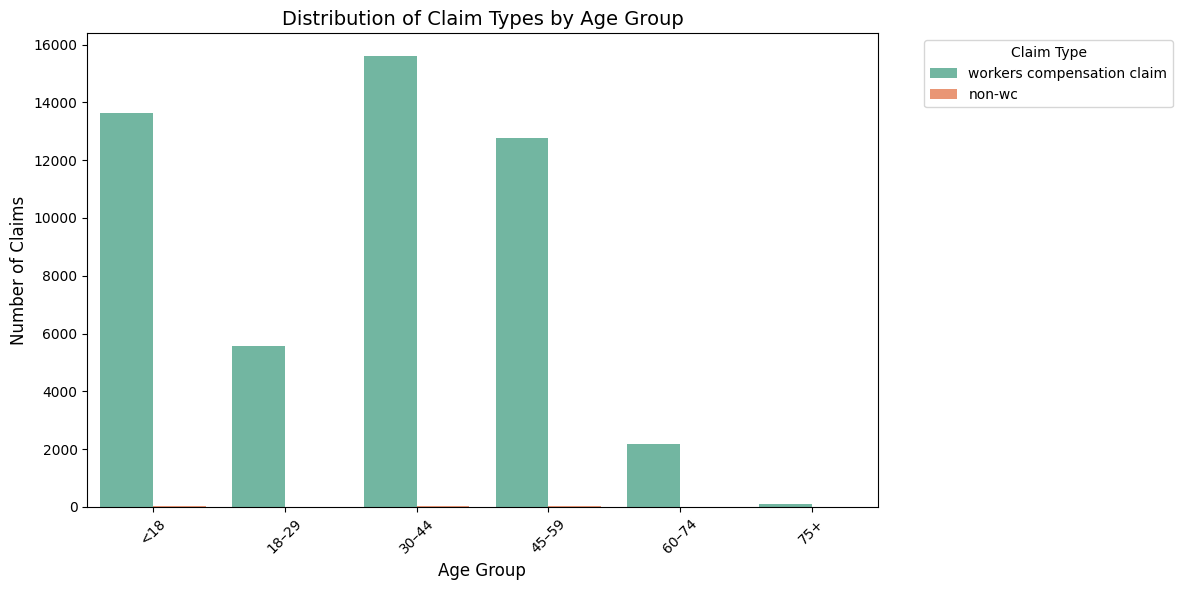

In [15]:
# Set plot style
plt.figure(figsize=(12, 6))
sns.countplot(
    data=LLM_claim_data,
    x='age_group',
    hue='claim_type',
    palette='Set2'
)

# Enhance plot
plt.title("Distribution of Claim Types by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Claims", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Claim Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###  Insights from the Visual

- The **30–44** age group shows the **highest number of claims**, followed by **<18**, and **45–59**. </br>
- **Claims are heavily concentrated among younger to middle-aged individuals**, especially those within active working age. </br>
- There is a **very low number of claims filed by those aged 60+**, </br>
  indicating fewer reported incidents or possibly underreporting in that group. </br>
- The chart also shows that **“workers compensation claims” dominate across all age groups**,  </br>
while **“non-wc” claims are nearly negligible**, which may reflect the operational scope or data collection emphasis.


### 4. Objective: Claim Injury Type by Age Group

This visualization aims to uncover **patterns in injury types across different age groups**, which is essential for:

- Personalized **triaging workflows** based on claimant demographics.
- Building robust **risk profiling models** for proactive mitigation.
- Supporting **targeted safety policies** and age-specific workplace interventions.

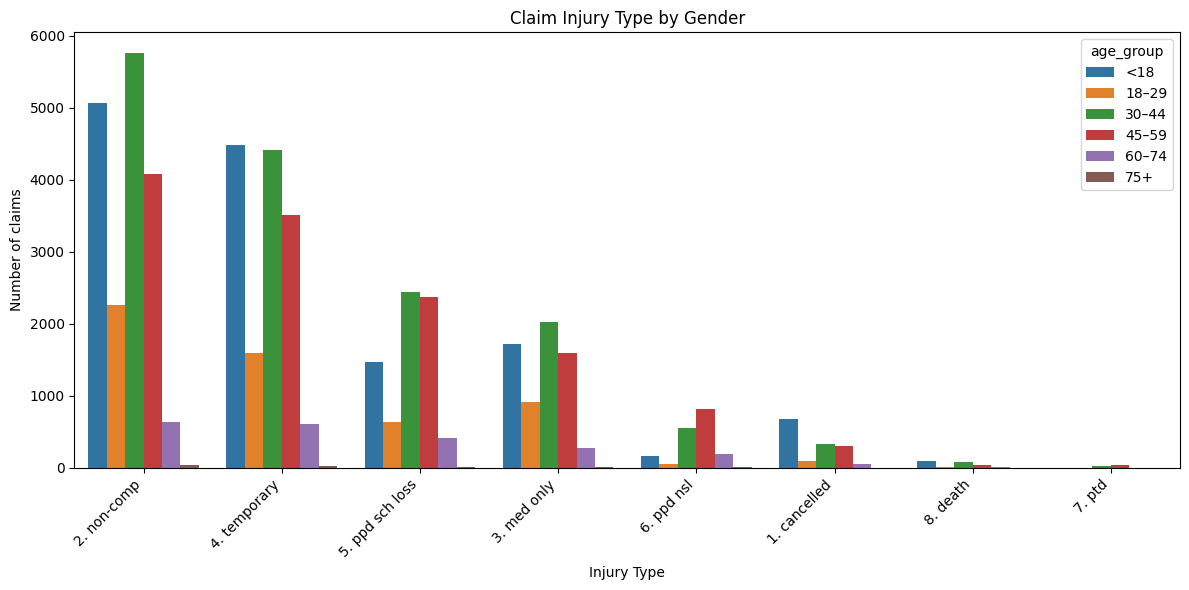

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=LLM_claim_data, x="claim_injury_type", hue="age_group", order=LLM_claim_data["claim_injury_type"].value_counts().index)
plt.title("Claim Injury Type by Gender")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Injury Type")
plt.ylabel("Number of claims")
plt.tight_layout()
plt.show()


### Insights from the Visual:

- The **<18** and **30–44** age groups report the highest number of claims, especially for:
  - **"non-comp"** (non-compensable cases)
  - **"temporary"** injuries (likely short-term medical cases)

- The **45–59** group shows increased frequency in **permanent disability** claims like:
  - **"ppd sch loss"** (Permanent Partial Disability – Scheduled Loss)
  - **"med only"** (Medical only with no time off)

- Claims such as **"cancelled"**, **"ptd"**, and **"death"** are rare and spread thinly across all age groups.

- **Older age groups (60–74 and 75+)** have fewer claims overall, possibly due to reduced workforce participation.

#### 5. Objective: `claim_injury_type` by `gender`
This analysis will help us: </br>
- Understand gender-based trends in injury-related claims </br>
- Assess whether certain injuries are predominantly reported by one gender </br>
- Detect potential systemic or workplace-related risks that affect specific groups </br>

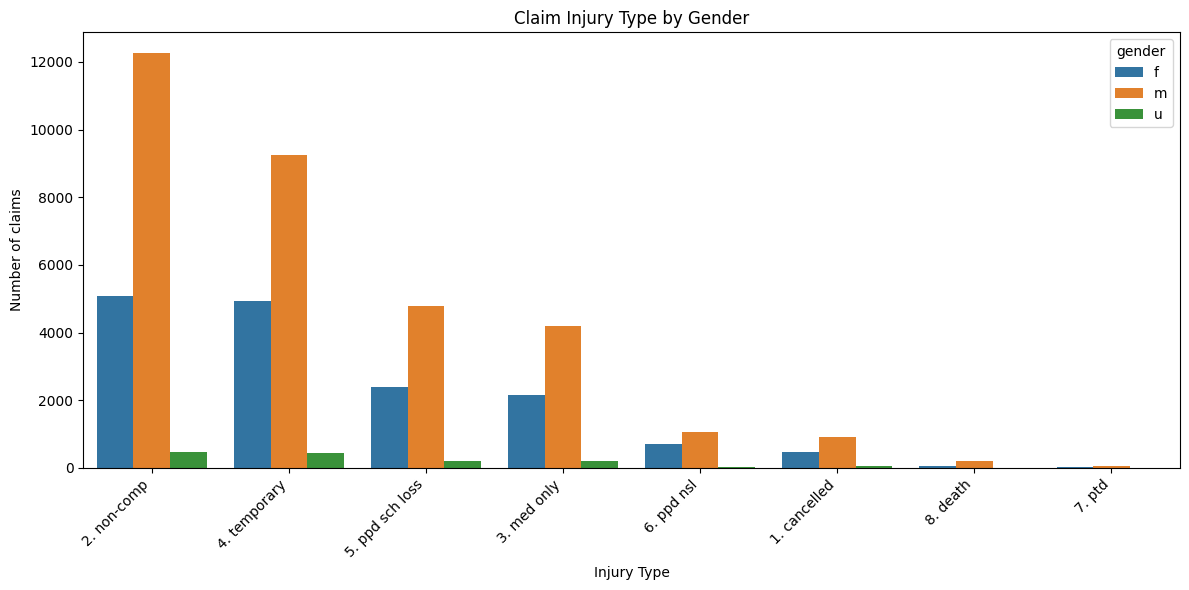

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=LLM_claim_data, x="claim_injury_type", hue="gender", order=LLM_claim_data["claim_injury_type"].value_counts().index)
plt.title("Claim Injury Type by Gender")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Injury Type")
plt.ylabel("Number of claims")
plt.tight_layout()
plt.show()


### Insights from the Visual:

- **Males (`m`) dominate** across all injury types, especially:
  - 🔸 *Non-comp* (12,000+)
  - 🔸 *Temporary* and *PPD Scheduled Loss* types
  - Suggests **higher workplace exposure** or **risk-prone roles**

- **Females (`f`) follow**, but at a significantly lower count:
  - Most frequent in *non-comp* and *temporary* injuries
  - Still notable participation in *PPD* and *medical-only* categories

- The **`u` (unknown)** gender category appears consistently but sparsely across injury types
  - Indicates **incomplete demographic data** or missing entries

---

These insights can help:
- Develop **gender-sensitive triage models**
- Inform **occupational health policies**
- Guide **data quality improvements** for missing gender fields

#### 6. Objective: `claim_type` by `district_name`
By comparing claim types across districts or regions, we can: </br>
- Identify geographic hotspots for certain claim types (e.g., traffic-related vs work-related) </br>
- Optimize resource allocation for claims processing teams </br>
- Detect potential regional fraud patterns or localized risk drivers </br>

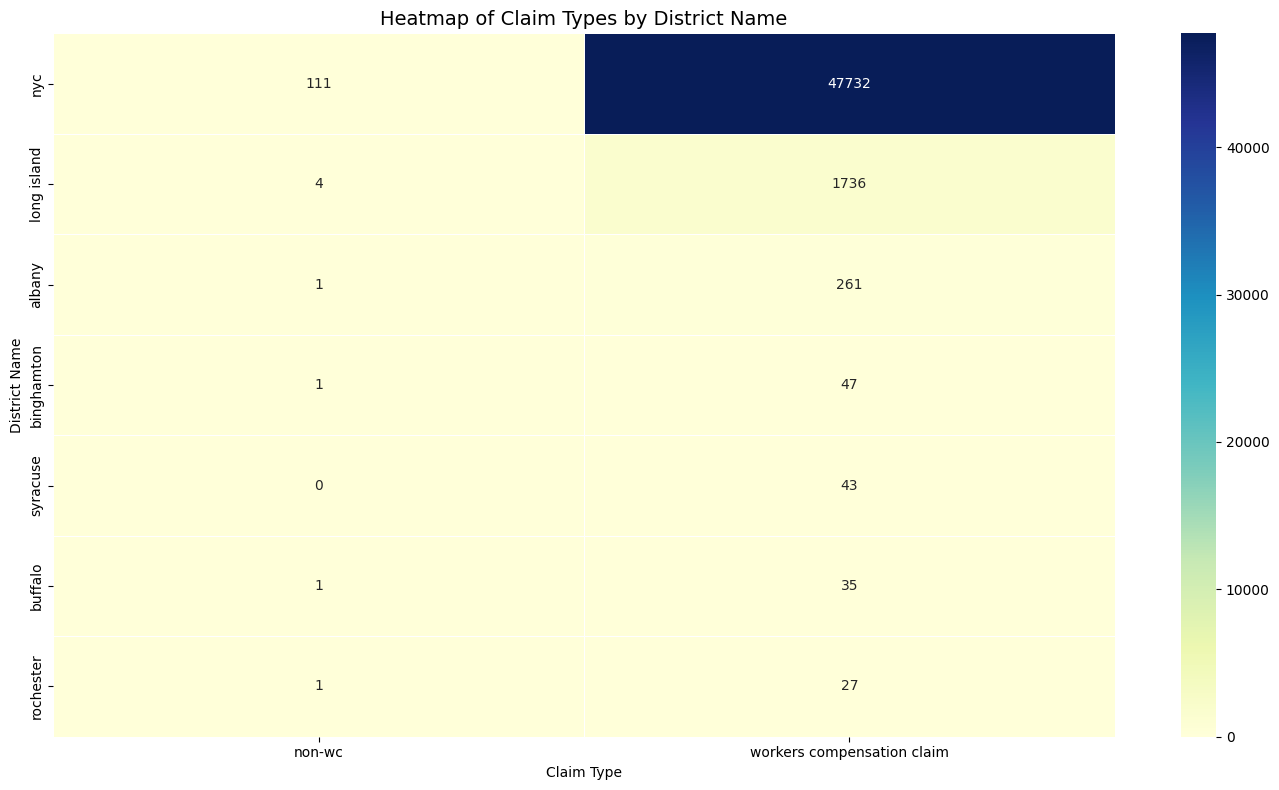

In [18]:
# Create a cross-tabulation table (district_name x claim_type)
heatmap_data = pd.crosstab(LLM_claim_data['district_name'], LLM_claim_data['claim_type'])

# Optional: sort rows by total claims
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index[:15]]

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

plt.title("Heatmap of Claim Types by District Name", fontsize=14)
plt.xlabel("Claim Type")
plt.ylabel("District Name")
plt.tight_layout()
plt.show()

### 🔍 Insights: Claim Types by District Name

The heatmap visualization reveals significant geographical disparities in the distribution of claim types across districts:

- **New York City (NYC)** leads by a substantial margin, recording over **47,000 workers compensation claims**. </br>
This indicates a major concentration of workplace-related incidents or possibly more efficient claim reporting systems in NYC. </br>

- **Long Island** and **Albany** follow distantly, with **1,736** and **261** claims respectively, highlighting NYC's outlier status.

- Districts like **Binghamton, Syracuse, Buffalo**, and **Rochester** show **very low or no non-WC claims**, suggesting:
  - Smaller workforce presence
  - Fewer hazardous working environments
  - Potential underreporting or centralized claims management

- **Non-workers compensation claims** are minimal across all districts, including NYC, </br>
reinforcing that the dataset is **heavily skewed toward workplace-related claims**. </br>

This geographic trend is crucial for **resource allocation**, **triage model tuning**, </br>
and **targeted safety interventions** in high-claim areas.

## Temporal Patterns: Seasonality & Volume Analysis

Understanding when claims occur and how they accumulate over time is essential for optimizing triaging models, </br>
allocating processing resources, and uncovering operational bottlenecks. </br>
This section explores the time-based behavior of insurance claims using visualizations that highlight seasonality, </br>
volume growth, and processing delays.


### 7. Objective: Cumulative Growth of Claims Over Time
This cumulative view provides a holistic look at:
- The rate at which claims are accumulating throughout the dataset
- Long-term trends or saturation points
- Whether claims growth is linear, exponential, or event-driven

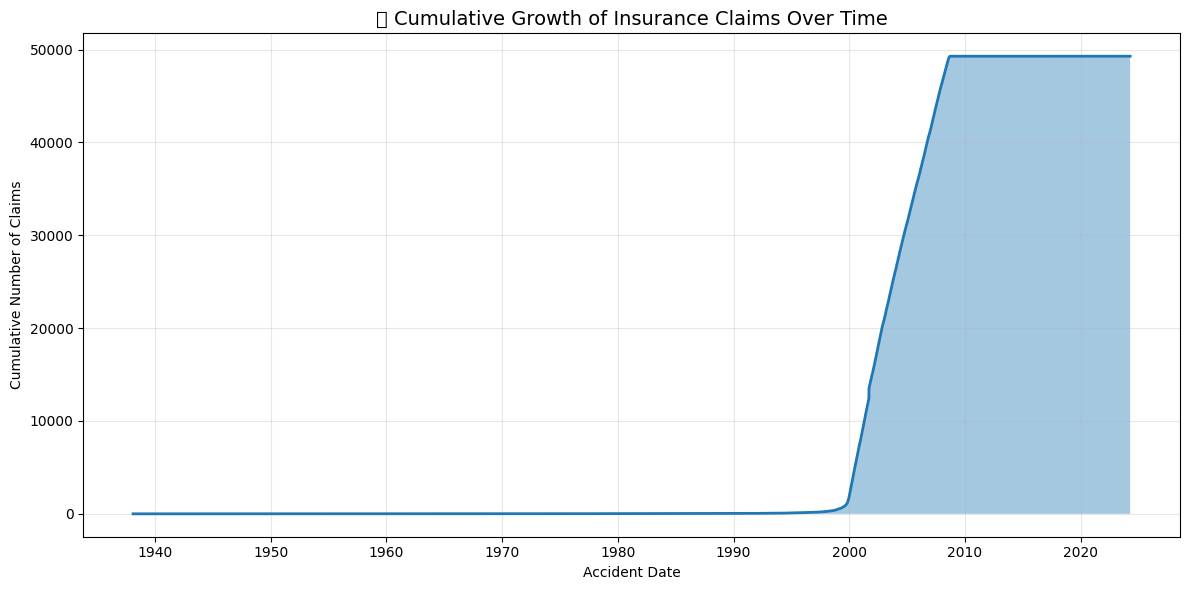

In [19]:
# Ensure accident_date is in datetime format
LLM_claim_data['accident_date'] = pd.to_datetime(LLM_claim_data['accident_date'], errors='coerce')

# Drop missing dates
cumulative_df = LLM_claim_data.dropna(subset=['accident_date'])

# Group by date and compute cumulative count
cumulative_df = (
    cumulative_df
    .groupby('accident_date')
    .size()
    .cumsum()
    .reset_index(name='cumulative_claims')
)

# Plot area chart
plt.figure(figsize=(12, 6))
plt.fill_between(cumulative_df['accident_date'], cumulative_df['cumulative_claims'], alpha=0.4)
plt.plot(cumulative_df['accident_date'], cumulative_df['cumulative_claims'], linewidth=2)

# Enhance plot
plt.title("📈 Cumulative Growth of Insurance Claims Over Time", fontsize=14)
plt.xlabel("Accident Date")
plt.ylabel("Cumulative Number of Claims")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

###  Cumulative Growth of Insurance Claims Over Time

The area plot clearly shows that the **majority of insurance claims occurred between the years 2000 and 2020**.</br>
During this period, there is a **sharp and consistent increase in cumulative claims**, indicating:</br>

- A possible rise in workplace incidents or better reporting mechanisms
- Increased workforce participation or expansion of industries covered by insurance
- Improved digital documentation and tracking of claims

The trend stabilizes after 2020, suggesting either a drop in incidents, delays in data collection, or recent data not yet captured.</br>

🔹 **Implication**: Models and policies targeting claim triaging and fraud detection should</br>
 **focus heavily on patterns from the 2000–2020 window**, as it contains the bulk of historical behavior.

### 8. Objective: Delays Between `accident_date` and Current Date
By calculating delays (i.e., the time between an accident occurring and the claim being processed), we can:
- Assess operational efficiency and processing lag
- Detect any backlogs in the claim handling process
- Uncover whether delays are consistent or fluctuate seasonally

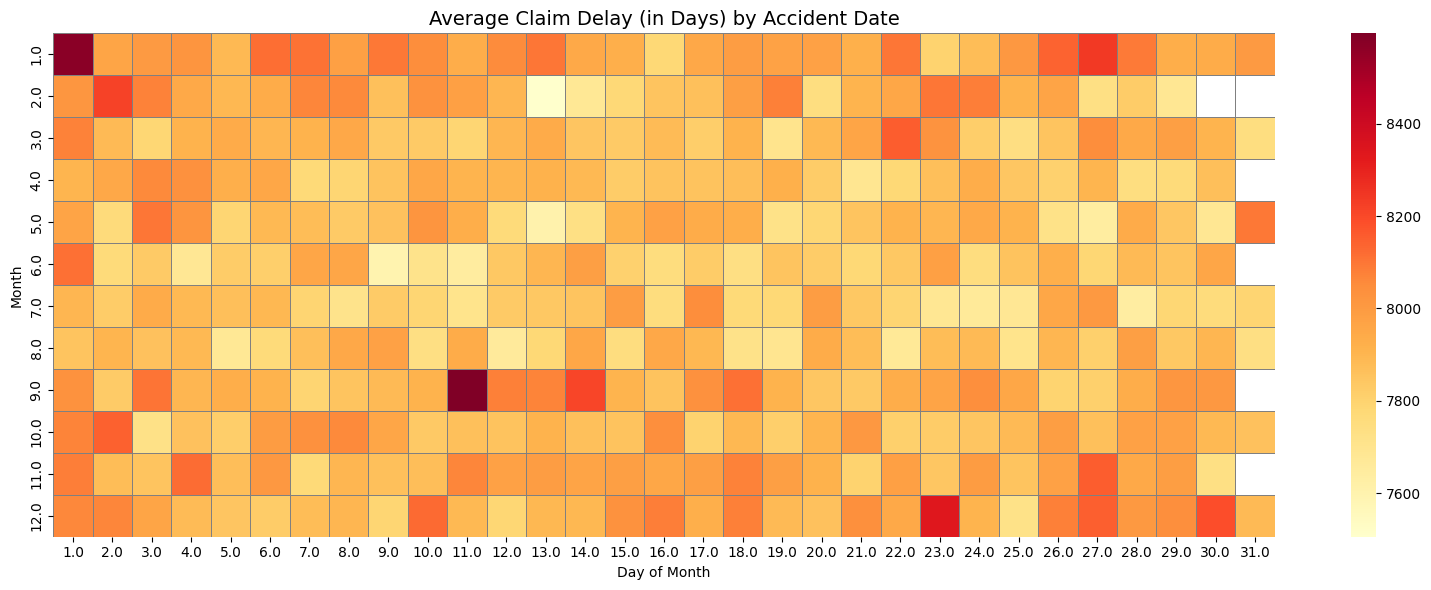

In [20]:
# Convert to datetime
LLM_claim_data['accident_date'] = pd.to_datetime(LLM_claim_data['accident_date'], errors='coerce')

LLM_claim_data['current_date'] = pd.to_datetime("today")

# Calculate delay in days
LLM_claim_data['delay_days'] = (LLM_claim_data['current_date'] - LLM_claim_data['accident_date']).dt.days

# Extract month and day for calendar-style plot
LLM_claim_data['accident_month'] = LLM_claim_data['accident_date'].dt.month
LLM_claim_data['accident_day'] = LLM_claim_data['accident_date'].dt.day

# Create pivot table for heatmap (average delay by day/month)
calendar_data = (
    LLM_claim_data
    .groupby(['accident_month', 'accident_day'])['delay_days']
    .mean()
    .unstack()
)

# Plot the calendar-style heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(calendar_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray', annot=False)

# Enhance plot
plt.title("Average Claim Delay (in Days) by Accident Date", fontsize=14)
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.tight_layout()
plt.show()


#### 🛠 Feature Engineering Note
The `accident_month` used in this visualization is an **engineered feature**, derived from the `accident_date`.</br>
This was done to better understand **temporal trends** and to support **seasonal analysis** of claim delays.</br>

#### 🔍 Insights
- The heatmap shows the **average number of days** it took for a claim to be submitted after the accident, grouped by **day of the month** and **month**.</br>
- **January 1st** and **September 11th** show the **longest average delays**, possibly due to public holidays, reduced staffing, or end-of-year backlogs.</br>
- Delays appear to be more **consistent mid-month**, suggesting operational stabilization after the start of each month.</br>
- **Seasonality matters**: 
- Higher average delays are seen in **January and September**, which may reflect administrative lags, </br>
  vacation periods, or bulk submissions.
- Understanding these patterns helps identify **bottlenecks** and informs **triaging strategy**, **resource planning**,</br> 
and potential **policy changes** to improve efficiency.

### 🔸 Number of claims across age groups
By analyzing the `age_group` feature, we aim to:
- Identify high-risk or high-volume age categories
- Support triage automation by prioritizing frequent age segments
- Explore whether specific age groups require specialized attention, communication, or interventions

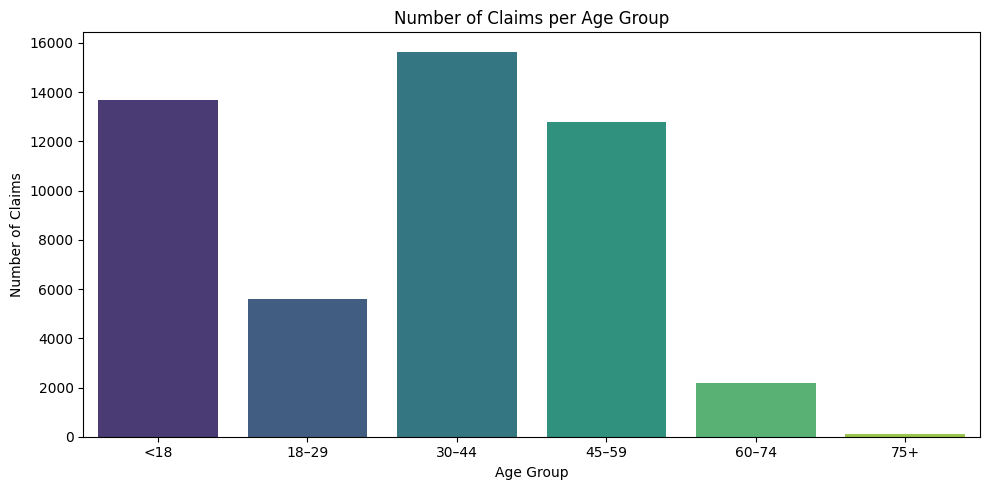

In [21]:
# Visualize age group distribution
labels = ['<18', '18–29', '30–44', '45–59', '60–74', '75+']

plt.figure(figsize=(10, 5))
sns.countplot(data=LLM_claim_data, x='age_group', order=labels, palette='viridis')
plt.title("Number of Claims per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Claims")
plt.tight_layout()
plt.show()

#### 🛠 Feature Engineering Note
The `age_group` used in this chart is an **engineered feature**, created by binning the continuous `age_at_injury`</br>
variable into defined age ranges. This helps make the data more interpretable and allows for better demographic analysis.</br>

#### 🔍 Insights
- The **30–44** age group submitted the **highest number of claims**, followed closely by **<18** and **45–59** age groups. </br>
This suggests a high incidence of work-related or insurable injuries among middle-aged adults and younger individuals.</br>
- The **18–29** age group has significantly fewer claims compared to adjacent age brackets. This might indicate:
  - Lower employment rates in high-risk sectors,
  - Less exposure to hazardous environments,
  - Or quicker recoveries resulting in fewer formal claims.
- Claims drop sharply for individuals aged **60+**, particularly **75+**, likely due to retirement and decreased workforce participation.
- These findings are important for understanding **risk exposure by age**, helping insurers or policymakers</br> 
tailor awareness, prevention, and triaging strategies effectively.

### 9. Objective: Number of Claims per `accident_month`
By analyzing how claims are distributed across different months of the year, we aim to:
- Identify seasonal spikes in claim volumes (e.g., post-holiday traffic or seasonal injuries)
- Align staffing levels with expected workloads
- Prepare the business for peak periods with appropriate resources and automation

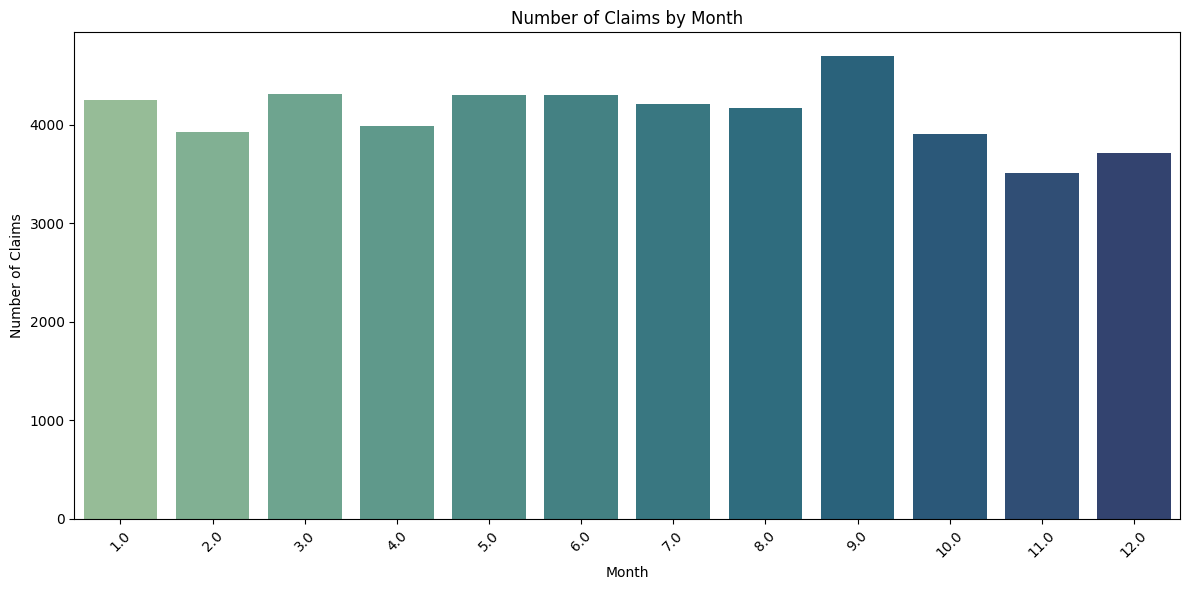

In [22]:
# Count number of claims per month
monthly_claims = LLM_claim_data['accident_month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_claims.index, y=monthly_claims.values, palette='crest')
plt.title('Number of Claims by Month')
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Number of Claims by Month

#### 🛠 Feature Engineering Note
The `month` variable used in this visual was **engineered** by extracting the month from the `accident_date`.</br>
This transformation helps identify **seasonal trends** and monthly **volume fluctuations** in insurance claims.</br>

#### Insights
- The **highest number of claims** occurred in **September (Month 9)**, followed closely by January, March, May, and June.</br>
- A noticeable **dip in claims** is seen in **November (Month 11)** and **December (Month 12)**.</br>
This could be due to holiday seasons, lower workforce activity, or delays in reporting claims.
- Months like **April** and **February** also reflect relatively lower claim volumes compared to peak months.
- These temporal patterns can help insurers with:
  - **Resource and capacity planning**
  - **Budget forecasting**
  - **Optimizing triage and staffing during peak claim periods**

### 10. Objective: Top 10 Claim Injury Types

The aim of this analysis is to **identify the most frequent injury types** filed in insurance claims.</br>
By ranking the top 10 injury categories, we can prioritize areas for intervention, resource allocation, </br>
and risk mitigation. This analysis supports strategic decisions in triaging, policy adjustments, and operational planning.</br>


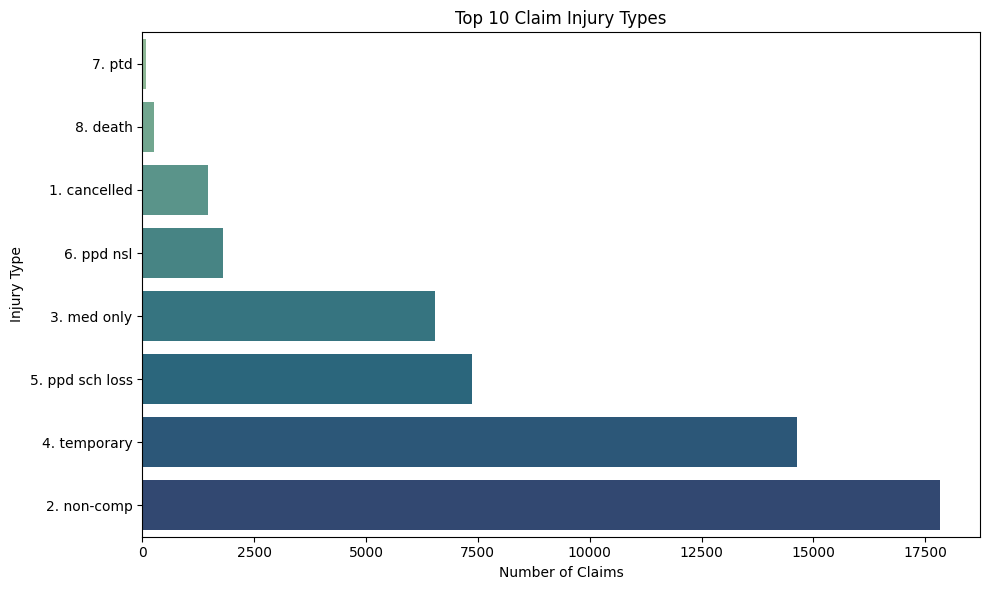

In [23]:
# Count top 10 injury types
top_injuries = (
    LLM_claim_data['claim_injury_type']
    .value_counts()
    .head(10)
    .sort_values()
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_injuries.values, y=top_injuries.index, palette='crest')
plt.title("Top 10 Claim Injury Types")
plt.xlabel("Number of Claims")
plt.ylabel("Injury Type")
plt.tight_layout()
plt.show()

#### 🔍 Insights
- The **most common injury type** is **"2. non-comp"**, accounting for the majority of claims.</br> 
This may indicate a significant number of non-compensable or ineligible claims.</br>
- **"4. temporary"** injury types follow closely, suggesting a large portion of claimants experience recoverable injuries.
- Claims related to **"5. ppd sch loss"** and **"3. med only"** are also prevalent,</br> 
highlighting moderate injuries that involve partial disability or medical-only treatment.</br>
- Severe claims like **"8. death"** and **"7. ptd"** (Permanent Total Disability) 
are rare but critical, likely associated with high-cost payouts.
- Administrative closures or claims without compensation, such as **"1. cancelled"**, also contribute notably to the dataset.

#### Why This Matters ?
- Prioritizing **frequent injury types** allows insurance providers and employers to design **preventative strategies** and **training programs**.
- Helps in understanding the **distribution of severity**, supporting actuarial teams in better **reserving** and **premium pricing**.
- Assists triaging systems in **automating classification** and **early intervention** for high-risk injury patterns.

### 11. Objective: Top 10 Districts by Claim Volume

The goal of this analysis is to **identify geographic hotspots** where insurance claims are most concentrated.</br>
By examining the **claim volume by district**, we aim to:
- Uncover **regional disparities** in claim frequency.
- Assist in **resource allocation** for claim assessors and support staff.
- Highlight areas that may require **preventive interventions** or deeper investigation into environmental or occupational risk factors.

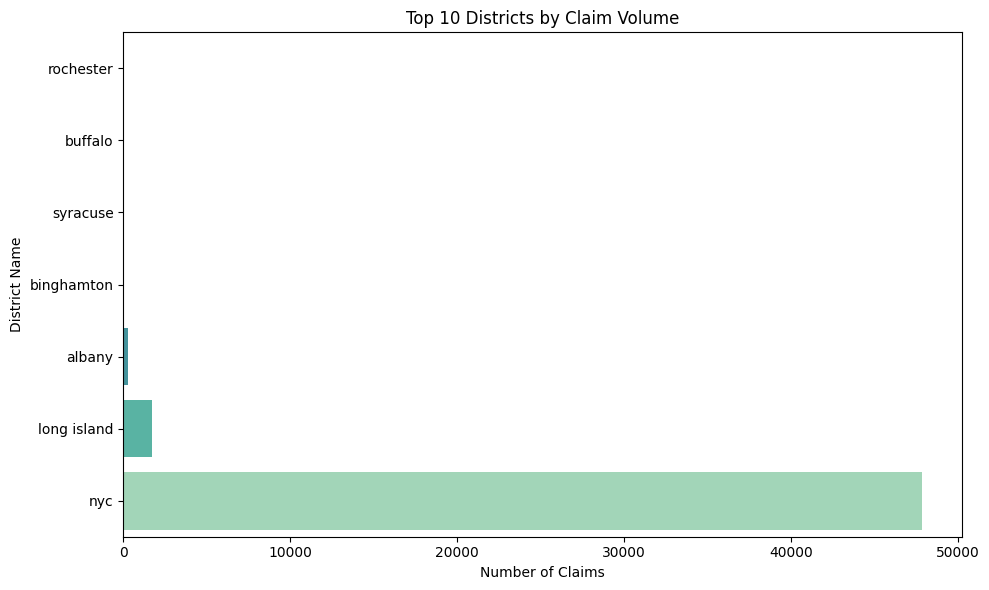

In [24]:
# Count top 10 districts
top_districts = (
    LLM_claim_data['district_name']
    .value_counts()
    .head(10)
    .sort_values()
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_districts.values, y=top_districts.index, palette='mako')
plt.title("Top 10 Districts by Claim Volume")
plt.xlabel("Number of Claims")
plt.ylabel("District Name")
plt.tight_layout()
plt.show()

#### Insights
- **New York City (NYC)** overwhelmingly leads in the number of claims, with nearly **48,000 claims**, dwarfing other districts.
- **Long Island** ranks second, but with a significantly lower volume, indicating a steep drop-off in claim activity beyond NYC.
- Other districts like **Albany**, **Buffalo**, **Syracuse**, and **Rochester** report **minimal claim volumes**, </br>
suggesting lower population exposure or better risk mitigation in those regions.
- This **geographic imbalance** may reflect urban population density, industry concentration, or reporting behavior.

#### Why This Matters
- Pinpointing high-claim districts supports **strategic staffing**, **fraud detection**, and **local risk management**.
- Data-driven targeting allows insurers to **design localized awareness campaigns**, enforce **safety regulations**, </br>
and improve service delivery where it is needed most.

### 12. Objective: Claim Volume by Current Claim Status

This analysis aims to **understand the current state of claims processing**</br>
by visualizing the distribution of claim statuses. Specifically, it helps:
- Track the **progress and resolution patterns** of claims.
- Identify stages where claims tend to **accumulate or stagnate**.
- Guide **operational efficiency improvements** and **workflow prioritization**.

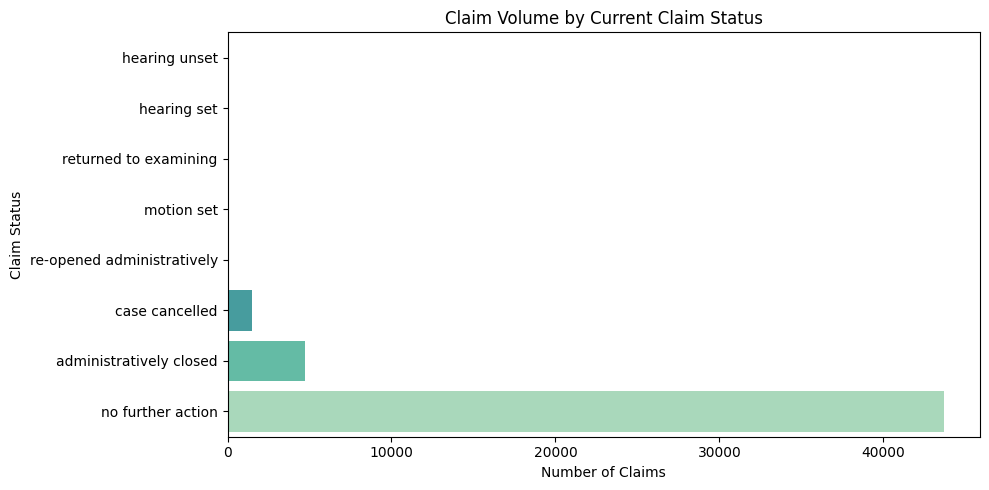

In [25]:
# Count statuses
status_counts = (
    LLM_claim_data['current_claim_status']
    .value_counts()
    .sort_values()
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=status_counts.values, y=status_counts.index, palette='mako')
plt.title("Claim Volume by Current Claim Status")
plt.xlabel("Number of Claims")
plt.ylabel("Claim Status")
plt.tight_layout()
plt.show()

####  Insights
- The majority of claims are marked as **"no further action"**, indicating that many cases</br>
may have been resolved or abandoned without a formal closure.
- A significant number of claims are **"administratively closed"**, showing the formal conclusion of claims that did not require escalation.
- Very few claims progress to formal stages such as **"hearing set"**, **"motion set"**, or **"returned to examining"**,</br>
suggesting that only a small portion of claims face legal or complex processing paths.
- The small proportion of **"case cancelled"** and **"re-opened administratively"** </br>
indicates minimal rework or reversals in claim outcomes.

####  Why This Matters
- This distribution helps in **assessing processing load**, understanding **system bottlenecks**, </br>
and **forecasting resource needs** for active claims.
- It also offers **operational transparency**—key for compliance reporting and internal audit processes.

## Summary of EDA Findings

### Claim Volume and Distribution  
Most claims fall under the category of **workers compensation claims**, while non-workers compensation claims are minimal. 
Geographically,</br>
**New York City (NYC)** dominates in claim volume, far ahead of other districts like Long Island and Albany.</br>
This suggests a strong concentration of workplace-related incidents in urban centers. </br>

The **30–44 age group** emerged as the most active in filing claims, followed by 45–59 and under 18,</br>
 reflecting typical working-age and dependent populations. The top injury types were:
- `non-comp`
- `temporary`
- `ppd sch loss`

These injury categories indicate the prevalence of minor to moderate injuries, which are common in workplace environments.

### Temporal Trends  
Claims surged between **2000 and 2020**, showing a significant increase in reporting or incidents during that period.</br> 
Notably, **September** recorded the highest monthly claims, hinting at potential seasonality in claim occurrences.

Averages in **claim delays** varied across days and months. This insight is based on an engineered `month` </br>
feature derived from `accident_date`, enabling us to capture seasonal trends and administrative inefficiencies more effectively.

### Demographic Patterns  
Gender analysis revealed that **males are significantly more likely to file injury claims**,</br>
particularly for non-comp and temporary injuries. Female claimants were underrepresented across all injury types.

The age distribution, powered by an engineered `age group` feature, confirmed that</br>
**younger and middle-aged adults** are the most frequent claimants.</br>
These insights reinforce the link between claim activity and employment status or exposure to physical work environments.

### Missing Data Patterns  
A review of missingness showed that some columns, such as `wcio_cause_of_injury_desc` and `wcio_nature_of_injury_desc`, </br>
had over **95% missing values** and were excluded from further analysis. However,</br>
columns like `accident_date`—although incomplete—were retained and labeled as `"Unknown"` due to their analytical relevance.

Missing data varied by claim type, with **workers compensation claims** having more complete records, making them more reliable for further modeling.

### Claim Status Insights  
The majority of claims resulted in either **"no further action"** or were **"administratively closed"**,</br>
showing that most cases are resolved without requiring legal escalation. Very few claims progressed to hearings or motions,</br>
indicating efficient internal processing or low dispute rates.

### Key Takeaways  
- **NYC and working-age males** are central to claim activity.  
- Seasonality and timing can influence volume and delay—vital for triaging and staffing.  
- **Engineered features** like `month` and `age group` revealed actionable patterns.  
- **Missing data** is manageable but requires selective cleaning and imputation.  
- This foundational analysis prepares the ground for **predictive modeling**, such as risk scoring, fraud detection, or delay estimation.

